# Flood areas in Saarland

![](https://www.en.urbandataplatform.hamburg/resource/crblob/797502/9c2f2d2edc1149673134bf88ece1dda5/logo-udp-data.jpg)
- Data is from the Hamburg Urban Data Portal [Hochwasserschutzlinie im Land Bremen](https://www.metaver.de:443/trefferanzeige?docuuid=0EAD7F6B-5A72-4906-B686-6B674BAB27E5&rstart=20&currentSelectorPage=1&f=type:opendata;&lang=de)


## Install Python Packages

In [3]:
pip install geopandas matplotlib

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pyogrio-0.11.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (5.3 kB)
  Using cached shapely-2.1.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64

## Import Python Packages

In [51]:
import os
import requests
import geopandas as gpd
import json
from jupytergis import GISDocument

## Generalized flood areas in a HQ100 event

- Data from the Hamburg Urban Data Portal [HQ100 Area100 generalized](https://www.metaver.de:443/trefferanzeige?docuuid=951ceb7b-7e60-4300-9db1-0d9fe6a062b0&q=Hochwasserschutz&rstart=10&currentSelectorPage=1&f=type:opendata;metadata_group:geoset;&lang=de )


- The HQ100 represents the land use of the flooded areas during events. Area100_generalized

- Timeliness of the data set: 01.06.2018

In [3]:
dset_hq100 = gpd.read_file("HQ100_Flaeche100_generalisiert/")

In [4]:
dset_hq100.crs

<Projected CRS: EPSG:31466>
Name: DHDN / 3-degree Gauss-Kruger zone 2
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Germany - former West Germany onshore west of 7°30'E - states of Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland.
- bounds: (5.86, 49.11, 7.51, 53.81)
Coordinate Operation:
- name: 3-degree Gauss-Kruger zone 2
- method: Transverse Mercator
Datum: Deutsches Hauptdreiecksnetz
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<Axes: >

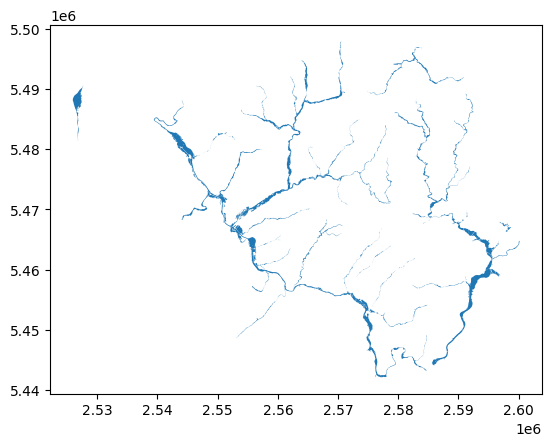

In [5]:
dset_hq100.plot()

In [25]:
filename = "HQ100_Flaeche100_generalisiert_4326.geojson"
if os.path.exists(filename):
    print("Skipped creation: file already exists.")
else:
    dset_hq100.to_crs(4326).to_file(filename, encoding="utf-8")

Skipped creation: file already exists.


## Flood risk - IED companies in Saarland


- [Flood risk IED Companies in Saarland](https://www.metaver.de:443/trefferanzeige?docuuid=391766b5-de80-4fe1-afc5-9c094e553f34&q=Saarland&rstart=90&f=type:opendata;metadata_group:geoset;&lang=de ) Data from the Hamburg Urban Data Portal 

In [8]:
dset_ied = gpd.read_file("IED-Anlagen/IED_Anlagen.shp")

In [9]:
dset_ied

,BETRIEB,GEWAESSER,GEWKZ,GEMEINDE,GEMARKUNG,geometry
0,Halberg Guss Saarbruecken Productions GmbH & C...,Mittlere Saar,264,Saarbrücken,Güdingen,POINT (2575521 5453107)
1,Saint Gobain PAM Deutschland GmbH & Co KG,Mittlere Saar,264,Saarbrücken,Brebach,POINT (2575657 5453713)
2,Willy Voit GmbH & Co,Mittlere Saar,264,St.Ingbert,St. Ingbert,POINT (2580780 5460529)
3,Terratec Bodensanierungsgesellschaft mbH,Mosel,26,Perl,Besch,POINT (2526723 5486150)
4,Gichtgaskraftwerk Dillingen GmbH & Co. KG,Prims,2646,Dillingen/Saar,Dillingen,POINT (2553913 5468859)
5,ROGESA mbH,Prims,2646,Dillingen/Saar,Dillingen,POINT (2554074 5468618)
6,Diehl BGT Defence GmbH & Co. KG,Prims,2646,Nonnweiler,Braunshausen,POINT (2570554 5495166)
7,Bauglasindustrie GmbH,Prims,2646,Schmelz,Bettingen,POINT (2561935 5477718)
8,Limbacher Verzinkerei GmbH,Prims,2646,Schmelz,Limbach,POINT (2563218 5482273)
9,Acument GmbH & Co. OHG,Saarschlauch,264,Beckingen,Beckingen,POINT (2550413 5472727)


In [10]:
dset_ied.crs

<Projected CRS: EPSG:31466>
Name: DHDN / 3-degree Gauss-Kruger zone 2
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Germany - former West Germany onshore west of 7°30'E - states of Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland.
- bounds: (5.86, 49.11, 7.51, 53.81)
Coordinate Operation:
- name: 3-degree Gauss-Kruger zone 2
- method: Transverse Mercator
Datum: Deutsches Hauptdreiecksnetz
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [26]:
filename = "IED_Anlagen_4326.geojson"
if os.path.exists(filename):
    print("Skipped creation: file already exists.")
else:
    dset_ied.to_crs(4326).to_file(filename, encoding="utf-8")

Skipped creation: file already exists.


## Open Jupyter notebook

In [28]:
doc = GISDocument("Saarland.jGIS")

In [29]:
doc.layers

{'38db5132-a634-4f99-b337-faf1cdbb00e0': {'parameters': {'color': {'circle-stroke-line-join': 'round',
    'circle-stroke-color': '#9929bd',
    'circle-stroke-width': 3.25,
    'circle-fill-color': '#fffc41',
    'circle-radius': 10.0,
    'circle-stroke-line-cap': 'round'},
   'source': '43e4b4dd-42fb-4e13-aa18-0be2169f8d60',
   'opacity': 1.0,
   'symbologyState': {'renderType': 'Single Symbol'},
   'type': 'circle'},
  'visible': True,
  'type': 'VectorLayer',
  'name': 'Flood risk - IED companies in Saarland'},
 'a92b01e1-864e-4b4e-b8c2-7d8f49b145d8': {'type': 'RasterLayer',
  'visible': True,
  'name': 'OpenStreetMap.Mapnik Layer',
  'parameters': {'source': '07f8bbdb-a412-44f1-8019-0b76c325b850'}},
 '3c99572e-f25c-43e5-9073-caee9c003f3b': {'name': 'Generalised flood areas in a HQ100 event',
  'visible': False,
  'type': 'VectorLayer',
  'parameters': {'opacity': 1.0,
   'source': '0648001d-4c1e-4ef3-8d6d-83ce2c560e36',
   'type': 'line',
   'color': {'stroke-line-join': 'round',

## Get location of picture from wikimedia Commons

In [16]:
def get_image_metadata(filename):
    url = "https://commons.wikimedia.org/w/api.php"
    params = {
        "action": "query",
        "titles": f"File:{filename}",
        "prop": "imageinfo",
        "iiprop": "extmetadata",
        "format": "json"
    }

    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    for page in pages.values():
        extmetadata = page.get("imageinfo", [{}])[0].get("extmetadata", {})
        gps = extmetadata.get("GPSLatitude", {}).get("value", None), extmetadata.get("GPSLongitude", {}).get("value", None)
        return gps, extmetadata

In [17]:
filename = "20240517_Flood_Saarland_07.jpg"
gps_coords, all_metadata = get_image_metadata(filename)

print("GPS Coordinates:", gps_coords)

GPS Coordinates: ('49.236090', '6.989930')


In [66]:
artefact_location = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "id": "camera_location_001",
        "description": "Camera location near Saarland flood event"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [6.989930, 49.236090]
      }
    }
  ]
}


In [67]:
with open("artefact_location.geojson", "w") as f:
    json.dump(artefact_location, f)

## Add location of the selected artefact

In [68]:
doc.add_geojson_layer(data=artefact_location, 
                      name='Artefact Location', type='circle', 
                      color_expr={"circle-fill-color": "#00FF00"})

'b665a6d7-846a-4263-9585-73d91f02964c'

In [60]:
doc.layers

{'28ee73ea-ec62-4dda-ac99-c739158c56c8': {'filters': {'logicalOp': None,
   'appliedFilters': [{'operator': None, 'feature': None, 'value': None}]},
  'name': 'Artefact Location',
  'type': 'VectorLayer',
  'parameters': {'source': '8c56259f-2588-437a-a561-fa4b604d7218',
   'color': {'circle-fill-color': '#00FF00'},
   'opacity': 1.0,
   'symbologyState': None,
   'type': 'circle'},
  'visible': True},
 '38db5132-a634-4f99-b337-faf1cdbb00e0': {'parameters': {'color': {'circle-stroke-line-join': 'round',
    'circle-stroke-color': '#9929bd',
    'circle-stroke-width': 3.25,
    'circle-fill-color': '#fffc41',
    'circle-radius': 10.0,
    'circle-stroke-line-cap': 'round'},
   'source': '43e4b4dd-42fb-4e13-aa18-0be2169f8d60',
   'opacity': 1.0,
   'symbologyState': {'renderType': 'Single Symbol'},
   'type': 'circle'},
  'visible': True,
  'type': 'VectorLayer',
  'name': 'Flood risk - IED companies in Saarland'},
 'a92b01e1-864e-4b4e-b8c2-7d8f49b145d8': {'type': 'RasterLayer',
  'visi

In [61]:
id = "28ee73ea-ec62-4dda-ac99-c739158c56c8"
doc.remove_layer(id)

In [45]:
doc.layers

{'38db5132-a634-4f99-b337-faf1cdbb00e0': {'parameters': {'color': {'circle-stroke-line-join': 'round',
    'circle-stroke-color': '#9929bd',
    'circle-stroke-width': 3.25,
    'circle-fill-color': '#fffc41',
    'circle-radius': 10.0,
    'circle-stroke-line-cap': 'round'},
   'source': '43e4b4dd-42fb-4e13-aa18-0be2169f8d60',
   'opacity': 1.0,
   'symbologyState': {'renderType': 'Single Symbol'},
   'type': 'circle'},
  'visible': True,
  'type': 'VectorLayer',
  'name': 'Flood risk - IED companies in Saarland'},
 'a92b01e1-864e-4b4e-b8c2-7d8f49b145d8': {'type': 'RasterLayer',
  'visible': True,
  'name': 'OpenStreetMap.Mapnik Layer',
  'parameters': {'source': '07f8bbdb-a412-44f1-8019-0b76c325b850'}},
 'ae61f025-442d-4fa3-a8ce-58fcfdc3e015': {'visible': True,
  'filters': {'logicalOp': None,
   'appliedFilters': [{'feature': None, 'operator': None, 'value': None}]},
  'type': 'VectorLayer',
  'name': 'GeoJSON Layer',
  'parameters': {'source': 'aad3dfb3-0ef7-4d8c-b630-535ad2c41c93'